# Importing Libraries

In [18]:
import numpy as nd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, f1_score
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

In [19]:
train_tweets_csv = pd.read_csv('tweets.csv')
test_tweets_csv = pd.read_csv('test_tweets.csv')

In [20]:
train_tweets = train_tweets_csv[['tweet_text', 'sentiment']]
test_tweets = test_tweets_csv[['tweet_text']]

# Data Analysis

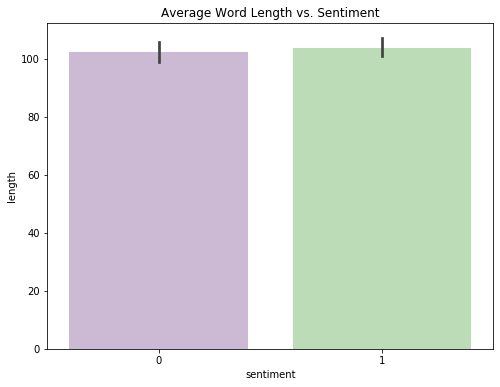

In [21]:
train_tweets['length'] = train_tweets['tweet_text'].apply(len)
# train_tweets['typeofsentiment'] = train_tweets['sentiment']

fig1 = sns.barplot('sentiment','length', data=train_tweets, palette='PRGn')
plt.title('Average Word Length vs. Sentiment')
plot = fig1.get_figure()
plot.savefig('Bargraph.png')

In [22]:
train_tweets.head()

,tweet_text,sentiment,length,typeofsentiment
0,"['RT', 'xerizz', 'say', 'bad', 'bitch', 'u', '...",1,69,1
1,"['BroncoSportsFB', 'DeniHawkinsKBOI', 'Curtis'...",0,77,0
2,"['RT', 'DrRosena', 'wo', 'retweeting', 'Boris'...",1,121,1
3,"['RT', 'purpleyulino', 'skin', 'word', 'much',...",0,69,0
4,"['RT', 'Catturd', 'interrupt', 'heat', 'FISA',...",1,95,1


8.0
6.0


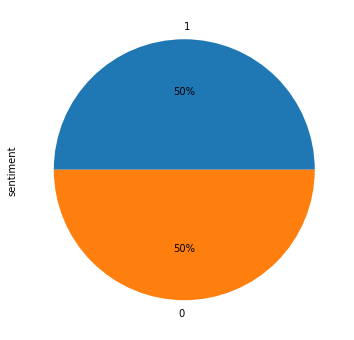

In [23]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

train_tweets['sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%')

# Model Selection & Machine Learning

In [24]:
X = train_tweets['tweet_text']
print(X)
y = train_tweets['sentiment']

0       ['RT', 'xerizz', 'say', 'bad', 'bitch', 'u', '...
1       ['BroncoSportsFB', 'DeniHawkinsKBOI', 'Curtis'...
2       ['RT', 'DrRosena', 'wo', 'retweeting', 'Boris'...
3       ['RT', 'purpleyulino', 'skin', 'word', 'much',...
4       ['RT', 'Catturd', 'interrupt', 'heat', 'FISA',...
                              ...                        
1649    ['RT', 'giddyforbangtan', 'Noooooo', 'way', 'j...
1650    ['RT', 'emmgrace_xo', 'part', 'hurt', 'literal...
1651                               ['RyanAbe', 'Sending']
1652    ['RT', 'lnkd_Mick', 'Finally', 'followers', 'p...
1653                              ['RT', 'Love', 'https']
Name: tweet_text, Length: 1654, dtype: object


In [25]:
test = test_tweets[['tweet_text']]

## Using Support Vector Machine:
### Training

In [26]:
tw_train, tw_test, label_train, label_test = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle = True)

In [27]:
pipe = Pipeline([
    ('vector', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(
                    loss='hinge',
                    penalty='l2',
                    alpha=1e-3,
                    random_state=42,
                    max_iter=100,
                    learning_rate='optimal',
                    tol=None
                ))
])

pipe.fit(tw_train, label_train)

precision    recall  f1-score   support

           0       0.91      0.91      0.91       169
           1       0.90      0.91      0.90       162

   micro avg       0.91      0.91      0.91       331
   macro avg       0.91      0.91      0.91       331
weighted avg       0.91      0.91      0.91       331

0.9063444108761329


### Prediction

In [ ]:
svm_predictions = pipe.predict(tw_test)
classification_result = classification_report(svm_predictions,label_test)
accuracy = accuracy_score(label_test, svm_predictions)
print(classification_result)
print(accuracy)

## Using Naive Bayes classifier:
### Training

In [28]:
print(test_tweets)

tweet_text
0     ['RT', 'SpillerOfTea', 'stop', 'point', 'Dom',...
1     ['EGYPTIANS', 'ROMAN', 'EMPIRE', 'AZTECS', 'ET...
2     ['thehill', 'tire', 'hysteria', 'matter', 'hat...
3     ['Unsapient', 'Kirinodere', 'Nope', 'Side', 'w...
4     ['cardierbazzi', 'Camila_Cabello', 'tell', 'fu...
...                                                 ...
1651  ['goodnight', 'yall', 'love', 'shawn', 'death'...
1652  ['RT', 'maikosimpao', 'please', 'careful', 're...
1653  ['RT', 'like', 'women', 'confident', 'openly',...
1654  ['hate', 'say', 'mom', 'yeah', 'sick', 'months...
1655  ['Yo', 'know', 'love', 'tell', 'mom', 'love', ...

[1656 rows x 1 columns]


In [29]:
pipe2 = Pipeline([
    ('vector', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

pipe2.fit(tw_train, label_train)

Pipeline(memory=None,
     steps=[('vector', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        str...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

### Prediction

In [30]:
nb_predictions = pipe2.predict(tw_test)

classification_result = classification_report(nb_predictions,label_test)
accuracy = accuracy_score(label_test, nb_predictions)
print(classification_result)
print(accuracy)

precision    recall  f1-score   support

           0       0.83      0.90      0.86       156
           1       0.90      0.84      0.87       175

   micro avg       0.87      0.87      0.87       331
   macro avg       0.87      0.87      0.87       331
weighted avg       0.87      0.87      0.87       331

0.8670694864048338
